# Attention mechanisms

In [48]:
# Imports

import numpy as np
import torch
import torch.nn.functional as F


In [49]:
# %%
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Our example phrase
phrase = "thinking machines"
words = phrase.split()
sequence_length = len(words)
embedding_dim = 4  # We'll use a small embedding dimension for simplicity

# Create simple word embeddings (in practice, these would be learned or pre-trained)
thinking_embedding = torch.tensor([0.1, 0.2, 0.3, 0.4])
machines_embedding = torch.tensor([0.9, 0.8, 0.7, 0.2])
embeddings = torch.stack([thinking_embedding, machines_embedding])

print("Word embeddings:")
for word, emb in zip(words, embeddings):
    print(f"{word}: {emb}")

Word embeddings:
thinking: tensor([0.1000, 0.2000, 0.3000, 0.4000])
machines: tensor([0.9000, 0.8000, 0.7000, 0.2000])


# Self-attention

Self-attention mechanisms are a cornerstone of modern natural language processing models, particularly in the realm of transformers. They are designed to compute dependency relationships between words within the same sentence, allowing the model to understand context and meaning more effectively.

## How Self-attention Works
Input Representation: Each word in a sentence is first converted into a vector representation, often referred to as an embedding. These embeddings capture the semantic meaning of the words.

Creating Query, Key, and Value Vectors: For each word embedding, we create three vectors: Query (Q), Key (K), and Value (V). These vectors are generated by multiplying the embedding by three different weight matrices. These weight matrices are learned during the training process. In our case, we'll use randomly initialized matrices.

## Benefits of Self-attention
Contextual Understanding: Self-attention allows the model to focus on relevant parts of the sentence, capturing long-range dependencies and contextual relationships between words.

## Parallelization: 

Unlike recurrent neural networks (RNNs), self-attention mechanisms can process all words in a sentence simultaneously, making them more efficient and faster to train.

## Scalability: 

Self-attention mechanisms can be scaled up to handle large datasets and complex tasks, making them suitable for a wide range of applications in natural language processing.

By leveraging self-attention mechanisms, models can achieve a deeper understanding of language, leading to more accurate and meaningful predictions.

# How do we compute self attention?

1. **Creating Query, Key, and Value Vectors**:
   The first step in calculating self-attention is to create three vectors from each input vector (which, in this case, could be a word embedding or any other input representation). For each input, we generate:
   - **Query vector (Q)**
   - **Key vector (K)**
   - **Value vector (V)**

   These vectors are created by multiplying the input vector by three different weight matrices. Since we don't have pre-trained matrices, we'll use randomly initialized matrices for this purpose.

   Notice that these new vectors are typically smaller in dimension than the input vector. For example, if our input vector has a dimensionality of 512, the Query, Key, and Value vectors might have a dimensionality of 64. This reduction in dimensionality is an architectural choice to make the computation of multi-headed attention more efficient.

   ![QKV](../images/qkv.png)


In [50]:
# Define learned weight matrices for Queries, Keys, and Values (for simplicity, using random values)
W_q = torch.randn(4, 3)  # 4-dim embedding to 3-dim Query
W_k = torch.randn(4, 3)  # 4-dim embedding to 3-dim Key
W_v = torch.randn(4, 3)  # 4-dim embedding to 3-dim Value

In [51]:
# Step 1: Calculate Queries, Keys, and Values
query_thinking = torch.matmul(thinking_embedding, W_q)  # q1
query_machines = torch.matmul(machines_embedding, W_q)  # q2

key_thinking = torch.matmul(thinking_embedding, W_k)  # k1
key_machines = torch.matmul(machines_embedding, W_k)  # k2

value_thinking = torch.matmul(thinking_embedding, W_v)  # v1
value_machines = torch.matmul(machines_embedding, W_v)  # v2

print("Query for 'thinking':", query_thinking)
print("Query for 'machines':", query_machines)
print("Key for 'thinking':", key_thinking)
print("Key for 'machines':", key_machines)
print("Value for 'thinking':", value_thinking)
print("Value for 'machines':", value_machines)

Query for 'thinking': tensor([ 0.8491, -0.1891,  0.4484])
Query for 'machines': tensor([ 2.0865, -1.1220,  0.5470])
Key for 'thinking': tensor([ 0.3474, -0.2608,  0.7883])
Key for 'machines': tensor([ 1.3668, -1.0541,  0.8695])
Value for 'thinking': tensor([ 0.3235, -0.1919, -0.1580])
Value for 'machines': tensor([0.2295, 0.3178, 0.8070])


2. **Calculating the Attention Scores**: 

    The second step in calculating self-attention is to calculate a **score**. 
    
    Say we’re calculating the self-attention for the first word in this example, “Thinking”. We need to score each word of the input sentence against this word. 
    
    The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position. The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring. So if we’re processing the self-attention for the word in position #1, the first score would be the dot product of q1 and k1. The second score would be the dot product of q1 and k2.

    ![QKV](../images/2.png)


In [52]:
# Step 2: Calculate the dot product of Query and Key vectors to get scores
score_thinking_thinking = torch.dot(query_thinking, key_thinking)  # q1 · k1
score_thinking_machines = torch.dot(query_thinking, key_machines)  # q1 · k2
score_machines_thinking = torch.dot(query_machines, key_thinking)  # q2 · k1
score_machines_machines = torch.dot(query_machines, key_machines)  # q2 · k2

print("\nScores (dot products):")
print("q1 · k1 (thinking vs thinking):", score_thinking_thinking.item())
print("q1 · k2 (thinking vs machines):", score_thinking_machines.item())
print("q2 · k1 (machines vs thinking):", score_machines_thinking.item())
print("q2 · k2 (machines vs machines):", score_machines_machines.item())



Scores (dot products):
q1 · k1 (thinking vs thinking): 0.6978102922439575
q1 · k2 (thinking vs machines): 1.7498583793640137
q2 · k1 (machines vs thinking): 1.4486947059631348
q2 · k2 (machines vs machines): 4.510115146636963


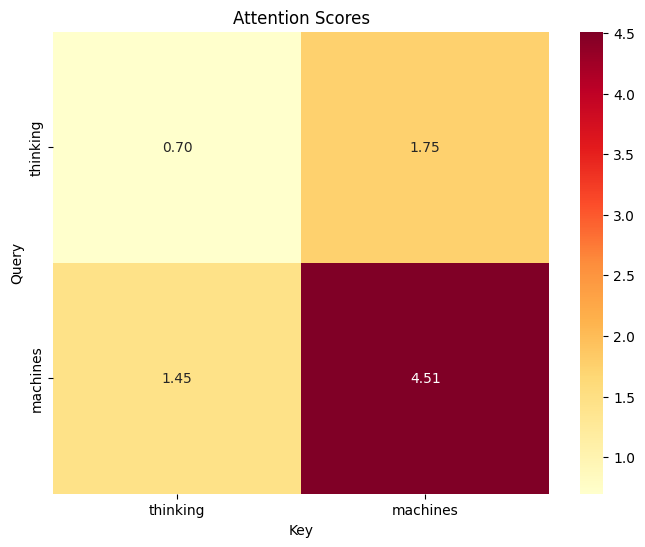

In [53]:
# Visualize attention scores
scores = torch.tensor([[score_thinking_thinking.item(), score_thinking_machines.item()],
                       [score_machines_thinking.item(), score_machines_machines.item()]])
plt.figure(figsize=(8, 6))
sns.heatmap(scores.numpy(), annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Attention Scores")
plt.xlabel("Key")
plt.ylabel("Query")
plt.xticks([0.5, 1.5], ["thinking", "machines"])
plt.yticks([0.5, 1.5], ["thinking", "machines"])
plt.show()

3. **Scaling the Scores**: 

    The third step is dividing the score by the square root of the key vectors' dimension.

![QKV](../images/3.png)


In [54]:
# Step 3: Scale the scores by sqrt(d_k)
dk = key_thinking.shape[-1]  # Dimensionality of the Key vector
scaled_score_thinking_thinking = score_thinking_thinking / torch.sqrt(torch.tensor(dk, dtype=torch.float32))
scaled_score_thinking_machines = score_thinking_machines / torch.sqrt(torch.tensor(dk, dtype=torch.float32))
scaled_score_machines_thinking = score_machines_thinking / torch.sqrt(torch.tensor(dk, dtype=torch.float32))
scaled_score_machines_machines = score_machines_machines / torch.sqrt(torch.tensor(dk, dtype=torch.float32))

print("\nScaled Scores:")
print("Scaled q1 · k1 (thinking vs thinking):", scaled_score_thinking_thinking.item())
print("Scaled q1 · k2 (thinking vs machines):", scaled_score_thinking_machines.item())
print("Scaled q2 · k1 (machines vs thinking):", scaled_score_machines_thinking.item())
print("Scaled q2 · k2 (machines vs machines):", scaled_score_machines_machines.item())



Scaled Scores:
Scaled q1 · k1 (thinking vs thinking): 0.4028809666633606
Scaled q1 · k2 (thinking vs machines): 1.0102812051773071
Scaled q2 · k1 (machines vs thinking): 0.8364042639732361
Scaled q2 · k2 (machines vs machines): 2.6039161682128906


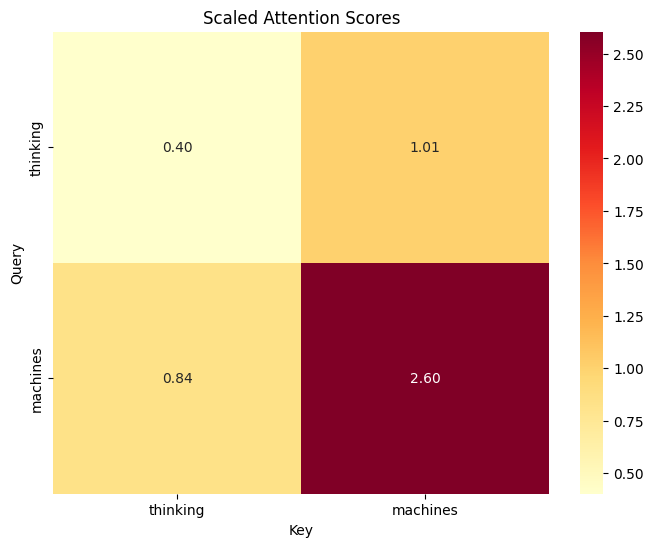

In [55]:
# Visualize scaled scores
scaled_scores = torch.tensor([[scaled_score_thinking_thinking.item(), scaled_score_thinking_machines.item()],
                              [scaled_score_machines_thinking.item(), scaled_score_machines_machines.item()]])
plt.figure(figsize=(8, 6))
sns.heatmap(scaled_scores.numpy(), annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Scaled Attention Scores")
plt.xlabel("Key")
plt.ylabel("Query")
plt.xticks([0.5, 1.5], ["thinking", "machines"])
plt.yticks([0.5, 1.5], ["thinking", "machines"])
plt.show()

4. The fourth step is to pass the result of the third step through a **SoftMax function**. 

    **This SoftMax score determines how much each word will be expressed at this position**. Clearly, the word at this position will have the highest SoftMax score, but sometimes it’s useful to attend to another word that is relevant to the current word.

![QKV](../images/4.png)


In [56]:
# Step 4: Apply SoftMax to get attention weights
scores_thinking = torch.tensor([scaled_score_thinking_thinking, scaled_score_thinking_machines])
attention_weights_thinking = F.softmax(scores_thinking, dim=-1)

scores_machines = torch.tensor([scaled_score_machines_thinking, scaled_score_machines_machines])
attention_weights_machines = F.softmax(scores_machines, dim=-1)

print("\nAttention Weights after SoftMax:")
print("Attention weights for 'thinking':", attention_weights_thinking)
print("Attention weights for 'machines':", attention_weights_machines)



Attention Weights after SoftMax:
Attention weights for 'thinking': tensor([0.3527, 0.6473])
Attention weights for 'machines': tensor([0.1459, 0.8541])


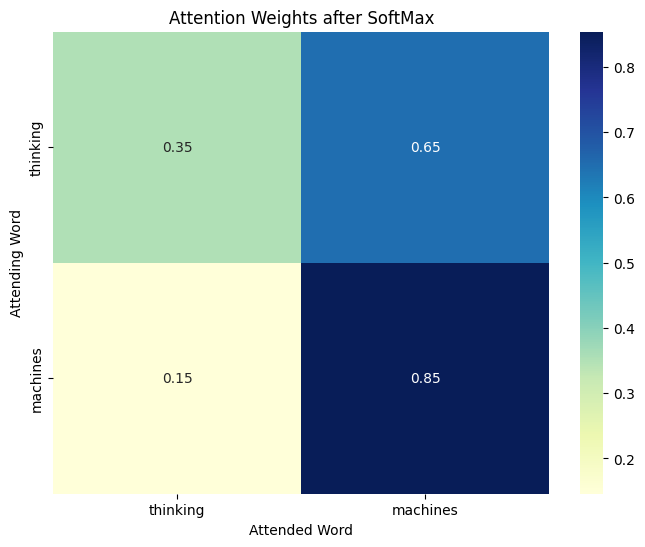

In [57]:
# Visualize attention weights
attention_weights = torch.stack([attention_weights_thinking, attention_weights_machines])
plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights.numpy(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Attention Weights after SoftMax")
plt.xlabel("Attended Word")
plt.ylabel("Attending Word")
plt.xticks([0.5, 1.5], ["thinking", "machines"])
plt.yticks([0.5, 1.5], ["thinking", "machines"])
plt.show()

5. The fifth step is to multiply each value vector by the SoftMax score (in preparation to sum them up). 
    
    The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).

   ![QKV](../images/5.png)


In [58]:

# Step 5.1: Multiply each Value vector by its corresponding attention weight
weighted_value_thinking_1 = attention_weights_thinking[0] * value_thinking  # First weighted Value for 'thinking'
weighted_value_thinking_2 = attention_weights_thinking[1] * value_machines  # Second weighted Value for 'thinking'

weighted_value_machines_1 = attention_weights_machines[0] * value_thinking  # First weighted Value for 'machines'
weighted_value_machines_2 = attention_weights_machines[1] * value_machines  # Second weighted Value for 'machines'

print("\nStep 5.1 - Weighted Values (before summation):")
print("Weighted Value 1 for 'thinking' (v1 * 0.88):", weighted_value_thinking_1)
print("Weighted Value 2 for 'thinking' (v2 * 0.12):", weighted_value_thinking_2)
print("Weighted Value 1 for 'machines' (v1 * ?):", weighted_value_machines_1)
print("Weighted Value 2 for 'machines' (v2 * ?):", weighted_value_machines_2)

# Step 5.2: Sum the weighted Value vectors
weighted_value_thinking = weighted_value_thinking_1 + weighted_value_thinking_2
weighted_value_machines = weighted_value_machines_1 + weighted_value_machines_2

# Output
print("\nStep 5.2 - Final Output (summed weighted Values):")
print("Weighted value for 'thinking':", weighted_value_thinking)
print("Weighted value for 'machines':", weighted_value_machines)



Step 5.1 - Weighted Values (before summation):
Weighted Value 1 for 'thinking' (v1 * 0.88): tensor([ 0.1141, -0.0677, -0.0557])
Weighted Value 2 for 'thinking' (v2 * 0.12): tensor([0.1486, 0.2057, 0.5224])
Weighted Value 1 for 'machines' (v1 * ?): tensor([ 0.0472, -0.0280, -0.0230])
Weighted Value 2 for 'machines' (v2 * ?): tensor([0.1961, 0.2715, 0.6893])

Step 5.2 - Final Output (summed weighted Values):
Weighted value for 'thinking': tensor([0.2627, 0.1381, 0.4667])
Weighted value for 'machines': tensor([0.2432, 0.2435, 0.6662])


In [60]:
# Step 6: Output attention results for "thinking" and "machines"
print("Attention output for 'thinking':", weighted_value_thinking)
print("Attention output for 'machines':", weighted_value_machines)

Attention output for 'thinking': tensor([0.2627, 0.1381, 0.4667])
Attention output for 'machines': tensor([0.2432, 0.2435, 0.6662])


# Parallelization

To parallelize the self-attention computation, we’ll move from handling individual vectors (queries, keys, values) to handling matrices. This allows us to perform the attention mechanism in a much more efficient manner by leveraging matrix multiplication.

In [61]:

# Sample word embeddings for a batch of tokens (thinking, machines)
embeddings = torch.tensor([[0.1, 0.2, 0.3, 0.4],   # "thinking"
                           [0.9, 0.8, 0.7, 0.2]])  # "machines"


In [62]:
# Define learned weight matrices for Queries, Keys, and Values
# Let's assume our embedding dimension is 4 and we're projecting them to 3 dimensions for queries, keys, and values
W_q = torch.randn(4, 3)  # 4-dim embedding to 3-dim Query
W_k = torch.randn(4, 3)  # 4-dim embedding to 3-dim Key
W_v = torch.randn(4, 3)  # 4-dim embedding to 3-dim Value


## Query, Key, and Value Matrices (Q, K, V):

Instead of computing queries, keys, and values for each individual word, we compute them for all words at once by multiplying the embedding matrix with the learned weight matrices (W_Q, W_K, W_V).
The resulting matrices Q, K, and V have the shape [batch_size, seq_len, d_model].

![Par](../images/par1.png)

In [63]:
# Step 1: Calculate the Query, Key, and Value matrices using matrix multiplication
# Instead of computing individually, we can now multiply the entire batch of embeddings with weight matrices
Q = torch.matmul(embeddings, W_q)  # Query matrix
K = torch.matmul(embeddings, W_k)  # Key matrix
V = torch.matmul(embeddings, W_v)  # Value matrix

print("Query matrix (Q):\n", Q)
print("Key matrix (K):\n", K)
print("Value matrix (V):\n", V)

Query matrix (Q):
 tensor([[-0.0992,  0.0446,  0.6179],
        [ 0.3641,  0.3713,  0.8925]])
Key matrix (K):
 tensor([[-0.9818, -0.1068, -0.0734],
        [-3.8190, -0.2060,  0.3097]])
Value matrix (V):
 tensor([[-0.2481, -1.5286, -0.2767],
        [ 1.3272, -1.8958,  0.2974]])


## Attention Scores (scores):

The attention scores are computed using matrix multiplication between Q and the transpose of K (K.T), resulting in a matrix of size [seq_len, seq_len], where each entry represents the attention score between two tokens.
This step replaces the dot-product step in the earlier vector-based method.

![Par](../images/par2.png)

In [64]:

# Step 2: Compute the dot product of Q and K^T to get the attention scores matrix
# We use matrix multiplication for all pairs of queries and keys
# Q is [batch_size, seq_len, d_k] and K^T is [batch_size, d_k, seq_len], resulting in a score matrix [batch_size, seq_len, seq_len]
scores = torch.matmul(Q, K.T)

## Scaled Attention Scores:

To stabilize the gradients, we scale the attention scores by dividing by the square root of the dimensionality of the key vectors (d_k).
![Par](../images/par3.png)

In [65]:
# Step 3: Scale the scores by the square root of the dimensionality of the Key vectors (d_k)
dk = K.shape[-1]  # Dimensionality of Key vectors
scaled_scores = scores / torch.sqrt(torch.tensor(dk, dtype=torch.float32))

print("\nScaled Scores (Q * K^T / sqrt(d_k)):\n", scaled_scores)



Scaled Scores (Q * K^T / sqrt(d_k)):
 tensor([[ 0.0273,  0.3239],
        [-0.2671, -0.6873]])


## Attention Weights:

We apply the softmax function along the last dimension to get attention weights. These weights sum to 1 and represent how much focus each token should place on every other token.

![Par](../images/par4.png)

In [66]:
# Step 4: Apply SoftMax to the scaled scores to get the attention weights
attention_weights = F.softmax(scaled_scores, dim=-1)

print("\nAttention Weights (SoftMax over scaled scores):\n", attention_weights)



Attention Weights (SoftMax over scaled scores):
 tensor([[0.4264, 0.5736],
        [0.6035, 0.3965]])


## Weighted Sum:

The attention weights are then used to compute a weighted sum of the value vectors. This results in the final output, which is a combination of the input token representations, weighted by their attention to other tokens.
![Par](../images/par5.png)

In [67]:
# Step 5: Compute the weighted sum of Value vectors using the attention weights
# Multiply the attention weights matrix with the Value matrix
# The attention weights are of shape [batch_size, seq_len, seq_len], and V is [batch_size, seq_len, d_v]
# We want to multiply attention weights [seq_len, seq_len] by V [seq_len, d_v]
weighted_values = torch.matmul(attention_weights, V)

print("\nWeighted Values (Attention Weights * Value):\n", weighted_values)


Weighted Values (Attention Weights * Value):
 tensor([[ 0.6556, -1.7392,  0.0526],
        [ 0.3765, -1.6742, -0.0491]])


# Conclusion of parallelization

* Q is the query matrix.
* K.T is the transposed key matrix.
* V is the value matrix.
* dk is the dimensionality of the key vectors.

* The dot product of Q and K.T gives the attention scores. These are then scaled by dividing by the square root of the key dimension (√dk), followed by applying the softmax function to get the attention weights. Finally, multiplying these attention weights by the value matrix V gives the attention output.

This one-liner efficiently encapsulates the entire self-attention process for a batch of sequences.

In [68]:
attention_output = torch.matmul(F.softmax(torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(dk, dtype=torch.float32)), dim=-1), V)

print("\nAttention Output (using matrix multiplication):\n", attention_output)


Attention Output (using matrix multiplication):
 tensor([[ 0.6556, -1.7392,  0.0526],
        [ 0.3765, -1.6742, -0.0491]])


# Batching 

To extend the parallelized self-attention to handle batches (as done in real-world scenarios), we must consider that each batch consists of multiple sequences. These sequences are independently processed, so the attention computation needs to be applied for each sequence in the batch.

Key Considerations for Batch Processing:
Batch Dimension: In a real-world scenario, the input typically has a shape of (batch_size, sequence_length, embedding_dim). This means you have multiple sequences (batch) being processed simultaneously.
Broadcasting: Operations like matrix multiplication need to be applied across the batch dimension.
Attention Over All Sequences: The attention should be computed independently for each sequence in the batch.
Extending the Self-Attention Formula for Batches:
Given Q, K, and V as matrices, now extended for batches, the formula stays conceptually the same but now operates over the batch dimension.

Where Q, K, and V have a shape of (batch_size, sequence_length, embedding_dim).

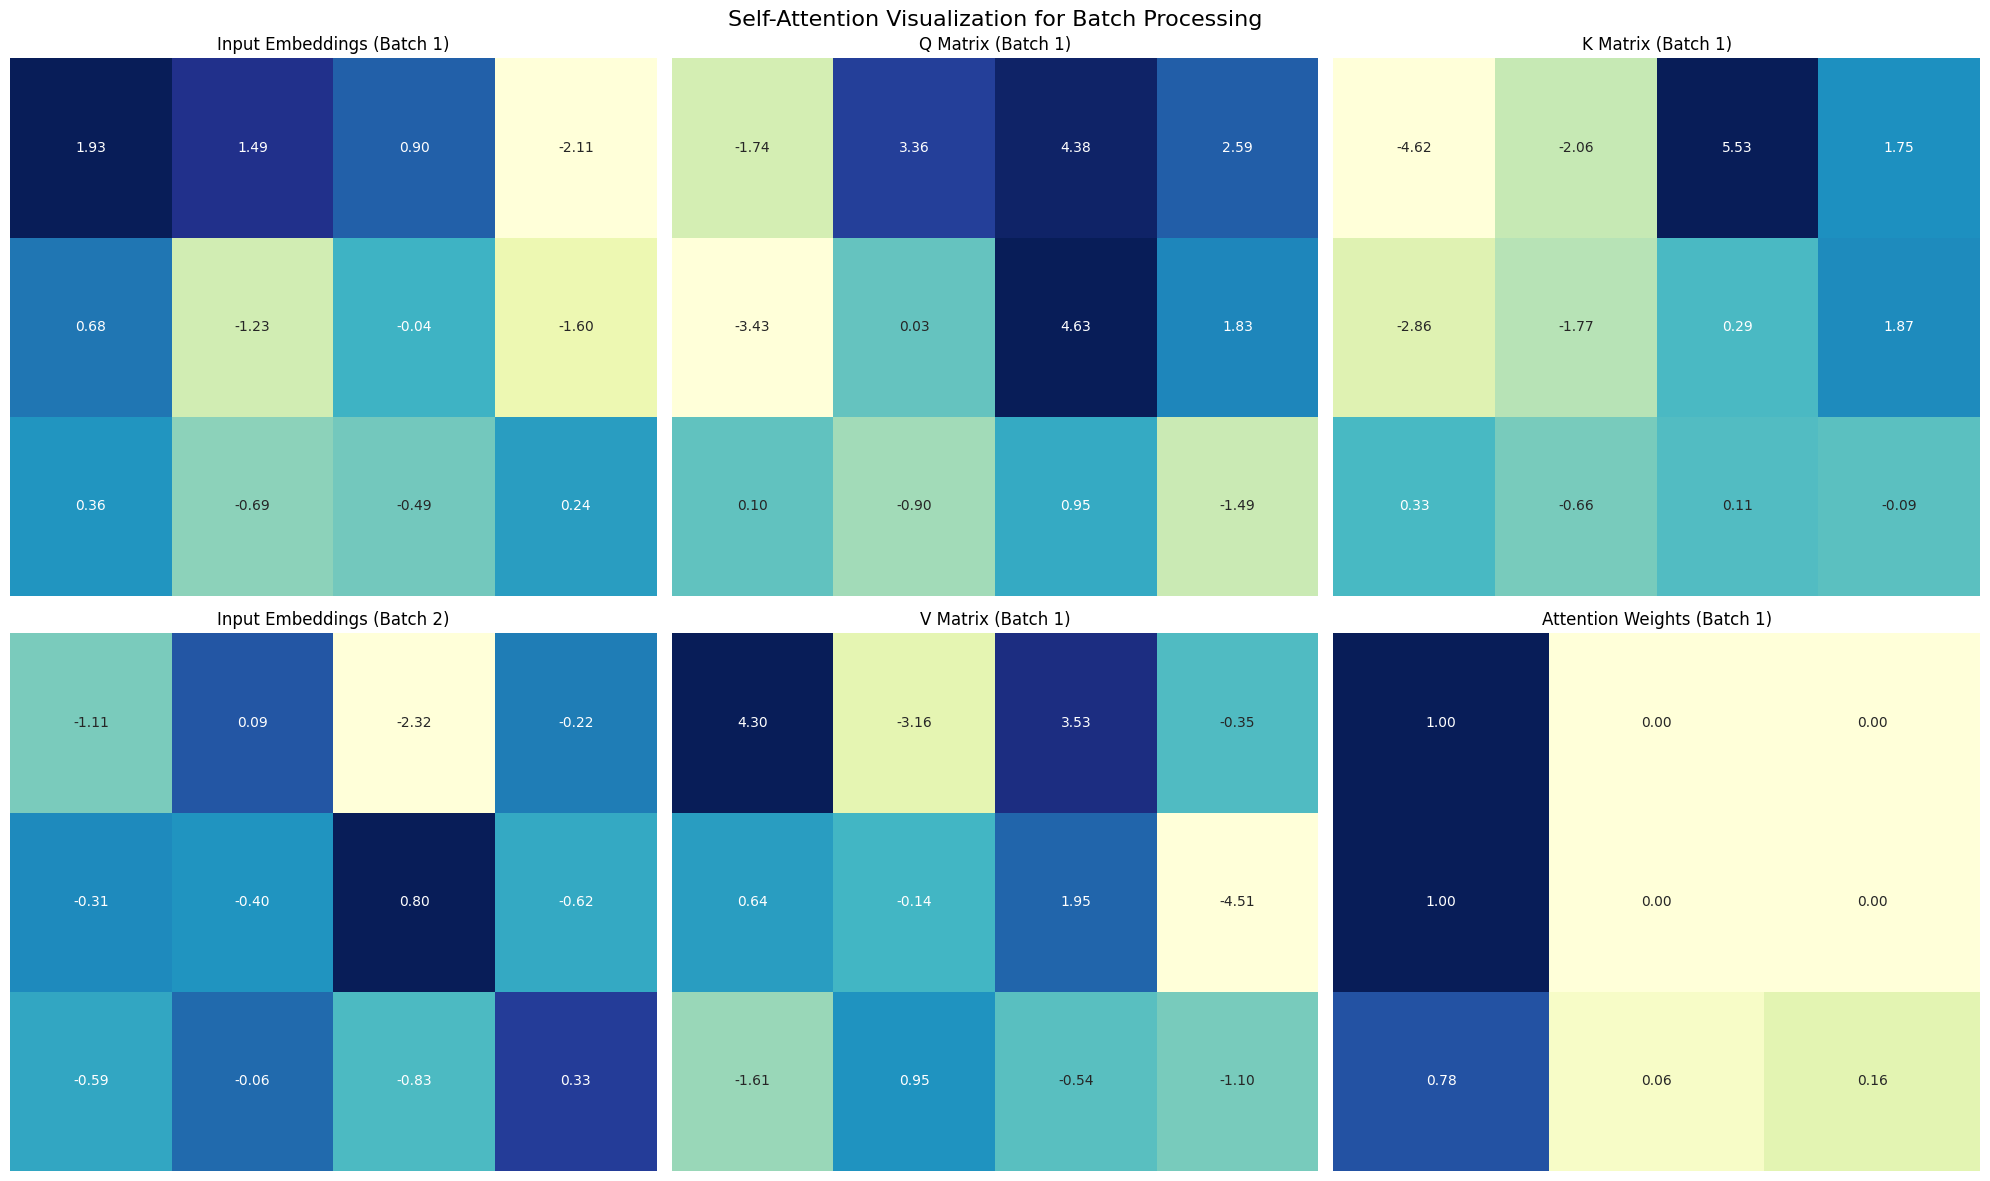

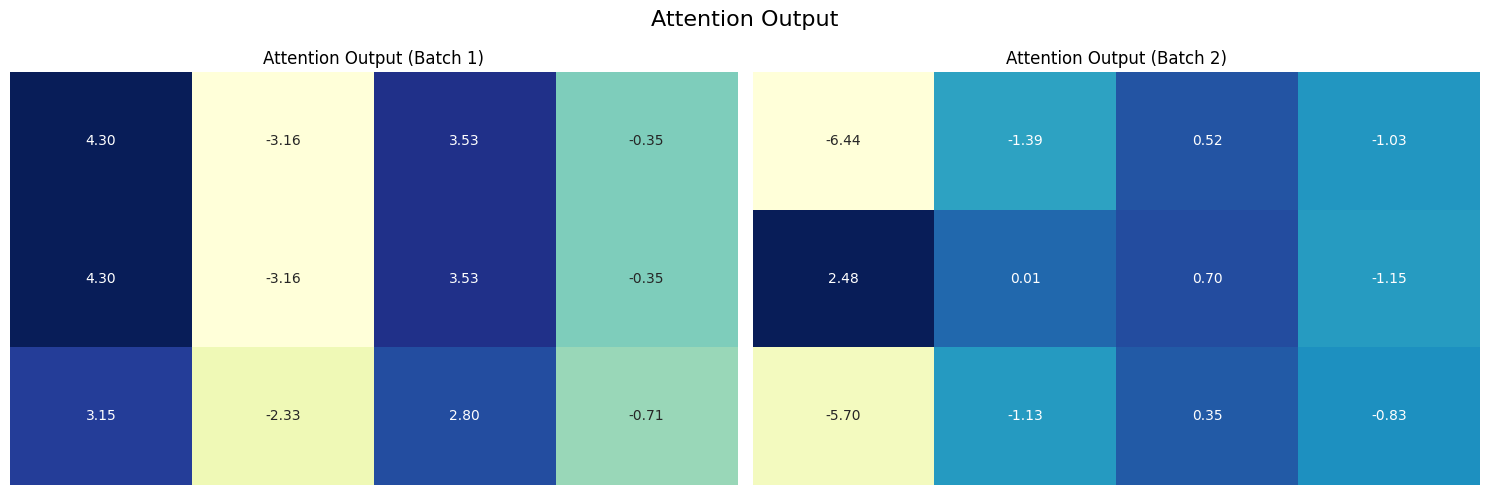

Attention output shape: torch.Size([2, 3, 4])
Attention output: tensor([[[ 4.2962, -3.1564,  3.5323, -0.3517],
         [ 4.2962, -3.1564,  3.5323, -0.3516],
         [ 3.1507, -2.3336,  2.7958, -0.7073]],

        [[-6.4421, -1.3885,  0.5231, -1.0308],
         [ 2.4792,  0.0134,  0.7026, -1.1488],
         [-5.6973, -1.1326,  0.3518, -0.8338]]])


In [70]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)

# Example: Batch of 2 sequences, each with 3 tokens, embedding dimension of 4
batch_size = 2
sequence_length = 3
embedding_dim = 4

# Randomly initialize input embeddings (batch_size, sequence_length, embedding_dim)
X = torch.randn(batch_size, sequence_length, embedding_dim)

# Define learned weight matrices for Queries, Keys, and Values (for simplicity, random values)
W_q = torch.randn(embedding_dim, embedding_dim)  # (4, 4)
W_k = torch.randn(embedding_dim, embedding_dim)  # (4, 4)
W_v = torch.randn(embedding_dim, embedding_dim)  # (4, 4)

# Step 1: Calculate Q, K, V matrices
Q = torch.matmul(X, W_q)  # (batch_size, sequence_length, embedding_dim)
K = torch.matmul(X, W_k)  # (batch_size, sequence_length, embedding_dim)
V = torch.matmul(X, W_v)  # (batch_size, sequence_length, embedding_dim)

# Step 2: Calculate attention scores (Q * K^T) and scale by sqrt(d_k)
dk = embedding_dim
attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(dk, dtype=torch.float32))

# Step 3: Apply SoftMax along the sequence dimension to get attention weights
attention_weights = F.softmax(attention_scores, dim=-1)

# Step 4: Multiply the attention weights by the Value matrix to get the final attention output
attention_output = torch.matmul(attention_weights, V)

# Visualization functions
def plot_matrix(matrix, title, ax):
    sns.heatmap(matrix.detach().numpy(), ax=ax, cmap="YlGnBu", annot=True, fmt=".2f", cbar=False)
    ax.set_title(title)
    ax.axis('off')

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Self-Attention Visualization for Batch Processing", fontsize=16)

# Input Embeddings
plot_matrix(X[0], "Input Embeddings (Batch 1)", axes[0, 0])
plot_matrix(X[1], "Input Embeddings (Batch 2)", axes[1, 0])

# Q, K, V matrices (showing only for the first batch)
plot_matrix(Q[0], "Q Matrix (Batch 1)", axes[0, 1])
plot_matrix(K[0], "K Matrix (Batch 1)", axes[0, 2])
plot_matrix(V[0], "V Matrix (Batch 1)", axes[1, 1])

# Attention Weights
plot_matrix(attention_weights[0], "Attention Weights (Batch 1)", axes[1, 2])

plt.tight_layout()
plt.show()

# Attention Output Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Attention Output", fontsize=16)

plot_matrix(attention_output[0], "Attention Output (Batch 1)", axes[0])
plot_matrix(attention_output[1], "Attention Output (Batch 2)", axes[1])

plt.tight_layout()
plt.show()

print("Attention output shape:", attention_output.shape)
print("Attention output:", attention_output)